In [1]:
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score, cohen_kappa_score
from sklearn import metrics 

In [2]:
df = pd.read_csv("voice.csv")

In [4]:
df['label'] = [1 if i=='male' else 0 for i in df.label]
df.label.value_counts()

1    1584
0    1584
Name: label, dtype: int64

In [5]:
x = df.drop(['label'],axis=1)
y = df.label.values

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

In [8]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)
print("Accuracy on training set: {:.5f}".format(knn.score(x_train, y_train)))
print("Accuracy on test set: {:.5f}".format(knn.score(x_test, y_test)))
predications = knn.predict(x_test)
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")


Accuracy on training set: 0.97751
Accuracy on test set: 0.97950
Out of total 634 samples 621 samples were predicted correctly


In [9]:
accscore = accuracy_score (y_test, predications)
recscore = recall_score (y_test, predications)
f1score = f1_score (y_test, predications)
kappascore =cohen_kappa_score(y_test,predications)
prescor = precision_score(y_test, predications)

In [10]:
print("Accuracy score :"+str(accscore))
print("Precision score :"+str(prescor))
print("Recall score :"+str(recscore))
print("F1 score :"+str(f1score))

Accuracy score :0.9794952681388013
Precision score :0.9792899408284024
Recall score :0.9821958456973294
F1 score :0.9807407407407408


# Confusion Matrix

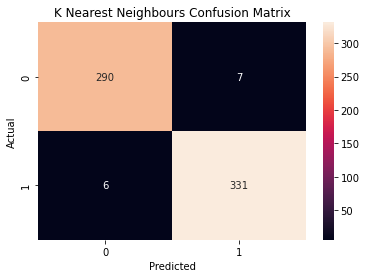

In [11]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("K Nearest Neighbours Confusion Matrix")
plt.show()

# Hyperparameter Tuning

In [12]:
from sklearn.model_selection import GridSearchCV

In [13]:
grid_params = { 'n_neighbors' : [5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [14]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [15]:
g_res = gs.fit(x_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 108 out of 108 | elapsed:    7.1s finished


In [16]:
g_res.best_score_

0.9739518775063799

In [17]:
g_res.best_params_

{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

In [18]:
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [19]:
print("Accuracy on training set: {:.5f}".format(knn.score(x_train, y_train)))
print("Accuracy on test set: {:.5f}".format(knn.score(x_test, y_test)))
predications = knn.predict(x_test)
print("Out of total 634 samples "+str(metrics.accuracy_score(y_test, predications,normalize = False))+" samples were predicted correctly")


Accuracy on training set: 0.98264
Accuracy on test set: 0.98107
Out of total 634 samples 622 samples were predicted correctly


# Confusion Matrix

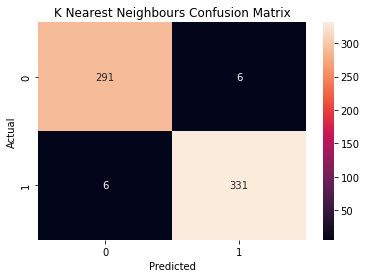

In [20]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test,predications)
sb.heatmap(conf_matrix,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("K Nearest Neighbours Confusion Matrix")
plt.show()

# ROC Curve

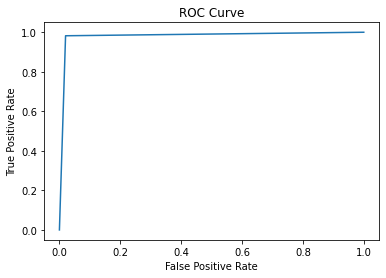

Area Under ROC Curve: 0.9809969127476545


In [23]:
from sklearn.metrics import roc_curve, auc
fpr1, tpr1, thresholds = metrics.roc_curve(y_test, predications, pos_label=0)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC Curve")
plt.plot(tpr1,fpr1)
plt.show()
auc = np.trapz(fpr1,tpr1)
print("Area Under ROC Curve:", auc)